## Founder Idea Fit

### Steps: Load Data -> Calculate Score -> Get Features -> Train Network

### Load Data First

##### Features: GPT3.5 -> 500 per each

In [2]:
import pandas as pd

In [3]:
successful = pd.read_csv("/Users/wangxiang/Desktop/VelaInternship/data/successful/categorical_successful_profiles_gpt-3.5-turbo_7_100_100.csv")
unsuccessful = pd.read_csv("/Users/wangxiang/Desktop/VelaInternship/data/Unsuccessful/categorical_unsuccessful_profiles_gpt-3.5-turbo_7_100_100.csv")

In [4]:
successful.head()

,Unnamed: 0,org_name,org_uuid,founder_linkedin_url,json_string,structured_info,paragraph,domain,status,founded_on,category_list,category_groups_list,country_code,city,short_description,long_description,integrated_info,categories
0,100,Afterpay,73dcd501-3e89-471b-9c34-b7a77ecabb1f,https://www.linkedin.com/in/anthony-eisen-a861...,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Anthony Eisen', 'gender': 'Male', 'b...",Anthony Eisen is known for their contribution ...,afterpay.com,acquired,1/1/14,"E-Commerce,FinTech,Payments,Retail Technology","Commerce and Shopping,Financial Services,Hardw...",AUS,Melbourne,Afterpay allows shoppers to receive products i...,Afterpay Limited has transformed the way peopl...,Organisation's Name: Afterpay Founder's Info: ...,"{\n ""startup_analysis_responses"": {\n ..."
1,101,Agile Robots AG,20885962-6777-4fd3-a4bc-c39e36e658da,https://www.linkedin.com/in/zhaopeng-chen-b828...,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Zhaopeng Chen', 'gender': '', 'birth...",Zhaopeng Chen is known for their contribution ...,agile-robots.com,operating,1/1/18,"Artificial Intelligence,Industrial Automation,...","Artificial Intelligence,Data and Analytics,Har...",DEU,Gilching,Agile Robots is an intelligent robot system de...,Agile Robots is an intelligent robot system de...,Organisation's Name: Agile Robots AG Founder's...,"{\n ""startup_analysis_responses"": {\n ""ind..."
2,102,Agility Robotics,d3280aba-4b61-6e7d-655d-0988cc3bbd40,https://www.linkedin.com/in/jonathan-hurst-b90...,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Jonathan Hurst', 'gender': 'Male', '...",Jonathan Hurst is known for their contribution...,agilityrobotics.com,operating,1/1/15,"Industrial Engineering,Mechanical Engineering,...","Hardware,Manufacturing,Science and Engineering...",USA,Albany,"Agility Robotics builds highly efficient, agil...",Agility Robotic's legged locomotion expertise ...,Organisation's Name: Agility Robotics Founder'...,"{\n ""startup_analysis_responses"": {\n ""ind..."
3,103,Agora.io,c5fda600-96e3-3a3d-4e1a-112e994a5f9b,https://www.linkedin.com/in/listerine/,"{""version"": 1, ""hits"": 2, ""results"": 1, ""kgver...","{'name': 'Tony Wang', 'gender': 'Male', 'birth...",Tony Wang is known for their contribution as F...,agora.io,ipo,1/1/12,"Developer APIs,Developer Tools,PaaS,Real Time","Other,Software",USA,Santa Clara,Agora.io enables developers to add HD interact...,Agora is a high-growth Communications-Platform...,Organisation's Name: Agora.io Founder's Info: ...,"{\n ""startup_analysis_responses"": {\n ""ind..."
4,104,Agora.io,c5fda600-96e3-3a3d-4e1a-112e994a5f9b,https://www.linkedin.com/in/tozhao/,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Tony Zhao', 'gender': 'Male', 'birth...",Tony Zhao is known for their contribution as C...,agora.io,ipo,1/1/12,"Developer APIs,Developer Tools,PaaS,Real Time","Other,Software",USA,Santa Clara,Agora.io enables developers to add HD interact...,Agora is a high-growth Communications-Platform...,Organisation's Name: Agora.io Founder's Info: ...,"{\n ""startup_analysis_responses"": {\n ""ind..."


In [5]:
# Load the Segmentation Data 

# Load the data

import pandas as pd
import os

PATH = os.getcwd()

successful_dataset_name = 'finalised_segmented_profiles_successful.csv'
successful_dataset = pd.read_csv(os.path.join(PATH,'data','successful',successful_dataset_name))

unsuccessful_dataset_name = ('finalised_segmented_profiles_unsuccessful.csv')
unsuccessful_dataset = pd.read_csv(os.path.join(PATH,'data','Unsuccessful',unsuccessful_dataset_name))

In [6]:
successful_dataset.head()

,founder_linkedin_url,json_string,structured_info,paragraph,segment
0,https://www.linkedin.com/in/ryan-johns-sf/,"{""version"": 1, ""hits"": 2, ""results"": 1, ""kgver...","{'name': 'Ryan Johns', 'gender': 'Male', 'birt...",Ryan Johns is known for their contribution as ...,L4
1,http://www.linkedin.com/in/smakani,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Shoaib Makani', 'gender': 'Male', 'b...",Shoaib Makani is known for their contribution ...,L4
2,https://www.linkedin.com/in/obaid-khan-b77b4357/,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Obaid Khan', 'gender': 'Male', 'birt...",Obaid Khan is known for their contribution as ...,L4
3,https://www.linkedin.com/in/alexbuttle,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Alex Buttle', 'gender': 'Male', 'bir...",Alex Buttle is known for their contribution as...,L4
4,http://www.linkedin.com/in/jonesharry,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Harry Jones', 'gender': 'Male', 'bir...",Harry Jones is known for their contribution as...,L4


In [7]:
import pandas as pd

# Assuming successful_dataset and unsuccessful_dataset are defined somewhere above

# Function to extract level from segment (e.g., "L2" -> 2)
def extract_level(segment):
    # Convert segment to string to ensure compatibility with .startswith
    segment_str = str(segment)
    # Check if the segment is in the expected format (e.g., "L2") and extract the level; else, return NaN or a default value
    if segment_str.startswith('L') and len(segment_str) > 1 and segment_str[1].isdigit():
        return int(segment_str[1])
    else:
        return float('nan')  # Return NaN or you can choose a default value, like 0 or 1, depending on your data's needs

# Apply the function to extract levels
successful_dataset['level'] = successful_dataset['segment'].apply(extract_level)
unsuccessful_dataset['level'] = unsuccessful_dataset['segment'].apply(extract_level)

# Function to calculate PFS
def calculate_pfs(level, outcome):
    return (6 - level) * outcome - level * (1 - outcome)

# Calculate PFS for successful and unsuccessful startups
# For successful startups, outcome = 1; for unsuccessful startups, outcome = 0
successful_dataset['PFS'] = successful_dataset['level'].apply(lambda x: calculate_pfs(x, 1))
unsuccessful_dataset['PFS'] = unsuccessful_dataset['level'].apply(lambda x: calculate_pfs(x, 0))

# Normalize PFS to range [-1, 1]
successful_dataset['FIS'] = successful_dataset['PFS'] / 5
unsuccessful_dataset['FIS'] = unsuccessful_dataset['PFS'] / 5

# Display the results
print("Successful Startups - Normalized PFS:")
print(successful_dataset[['segment', 'FIS']].head())

print("\nUnsuccessful Startups - Normalized PFS:")
print(unsuccessful_dataset[['segment', 'FIS']].head())


Successful Startups - Normalized PFS:
  segment  FIS
0      L4  0.4
1      L4  0.4
2      L4  0.4
3      L4  0.4
4      L4  0.4

Unsuccessful Startups - Normalized PFS:
  segment  FIS
0      L4 -0.8
1      L5 -1.0
2      L2 -0.4
3      L3 -0.6
4      L4 -0.8


### Let's Now Do Feature Engineering

In [8]:
from openai import OpenAI

client = OpenAI(api_key='', )

def getResponse( System_Content, User_Content, input_model):
    completion = client.chat.completions.create(
    model=input_model,
    messages=[
        {"role": "system", "content": System_Content},
        {"role": "user", "content": User_Content}
    ],
    #response_format={"type": "json_object"}
    )
    return completion.choices[0].message.content

In [9]:
# Nice! Now let's design the prompt to ask for quantitative scores

Powerful_Prompt = """
Given a startup description, convert it into a detailed JSON structure where various aspects of the startup are evaluated on a scale from 1 to 10, with 10 being the best and 1 being the lowest. Alongside each score, provide a brief justification or summary explaining the score. Here are the aspects to include:

- name: The official name of the startup. [Score: NaN, Justification: Not applicable]
- description: A brief overview of what the startup does. [Score: NaN, Justification: Not applicable]
- market_size: The size of the market the startup is targeting. [Score, Justification]
- growth_rate: The growth rate of the market. [Score, Justification]
- competition: Level of competition in the space. [Score, Justification]
- market_trends: Current trends within the market. [Score, Justification]
- go_to_market_strategy: The startup's plan for entering the market. [Score, Justification]
- product_details: Details about the startup's product or service. [Score, Justification]
- technology_stack: Technologies used in the product. [Score, Justification]
- scalability: How the product can scale. [Score, Justification]
- user_feedback: Any feedback received from users. [Score, Justification]
- product_fit: How well the product fits the target market. [Score, Justification]
- founder_backgrounds: Background information on the founders. [Score, Justification]
- track_records: The track records of the founders. [Score, Justification]
- leadership_skills: Leadership skills of the team. [Score, Justification]
- vision_alignment: How the team's vision aligns with the product. [Score, Justification]
- team_dynamics: The dynamics within the startup team. [Score, Justification]
- web_traffic_growth: Information on the growth of web traffic to the startup's site. [Score, Justification]
- social_media_presence: The startup's presence on social media. [Score, Justification]
- investment_rounds: Details of any investment rounds. [Score, Justification]
- regulatory_approvals: Any regulatory approvals obtained. [Score, Justification]
- patents: Details of any patents held by the startup. [Score, Justification]

For example, given the description: "Startup ABC is revolutionizing the fintech industry with its blockchain-based payment solution. The platform enables instant, secure, and fee-free transactions. Founded by a team of blockchain experts and fintech veterans, Startup ABC aims to disrupt traditional banking services."

The JSON structure should look like this:
{
    "name": "Startup ABC", [NaN, "Not applicable"]
    "description": "Revolutionizing the fintech industry with a blockchain-based payment solution.", [NaN, "Not applicable"]
    "market_size": "Estimated at $5 billion", [7, "Quite big market potential."]
    "growth_rate": "20% annually", [9, "Very fast growing market."]
    "competition": "Traditional banks and other fintech startups", [5, "Various competitions but strong positioning."]
    "market_trends": "Increasing adoption of blockchain technology", [8, "Highly favorable trend towards blockchain."]
    ...
    "patents": "2 patents on blockchain transaction algorithms", [7, "Innovative, but more development needed."]
}
"""

# But this is abandonded

### Now let's merge dataset & calculate embeddings

In [10]:
PATH = os.getcwd()
DATA_DIRPATH = os.path.join(os.getcwd(), 'data')
premerge_succ_name = "successful/Merged_Successful_V2.csv"
premerge_unsucc_name = 'Unsuccessful/Merged_Unsuccessful_V2.csv'

premerge_succ = pd.read_csv(os.path.join(DATA_DIRPATH, premerge_succ_name))
premerge_unsucc = pd.read_csv(os.path.join(DATA_DIRPATH, premerge_unsucc_name))

In [11]:
premerge_succ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4034 entries, 0 to 4033
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            4034 non-null   int64 
 1   org_name              4034 non-null   object
 2   org_uuid              4034 non-null   object
 3   founder_linkedin_url  4034 non-null   object
 4   json_string           4034 non-null   object
 5   structured_info       4034 non-null   object
 6   paragraph             4034 non-null   object
 7   domain                4031 non-null   object
 8   status                4034 non-null   object
 9   founded_on            4034 non-null   object
 10  category_list         4024 non-null   object
 11  category_groups_list  4024 non-null   object
 12  country_code          4027 non-null   object
 13  city                  4027 non-null   object
 14  short_description     4034 non-null   object
 15  long_description      4034 non-null   

In [12]:
successful_dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4065 entries, 0 to 4064
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   founder_linkedin_url  4065 non-null   object 
 1   json_string           4065 non-null   object 
 2   structured_info       4065 non-null   object 
 3   paragraph             4065 non-null   object 
 4   segment               1001 non-null   object 
 5   level                 1001 non-null   float64
 6   PFS                   1001 non-null   float64
 7   FIS                   1001 non-null   float64
dtypes: float64(3), object(5)
memory usage: 254.2+ KB


In [16]:
merged_unsuccessful_to_use = pd.merge(unsuccessful_dataset, premerge_unsucc, on='founder_linkedin_url', how='inner')

In [17]:
## Merging the data for use
# Merge the datasets on 'founder_linkedin_url'
merged_successful_to_use = pd.merge(successful_dataset, premerge_succ, on='founder_linkedin_url', how='inner')
merged_unsuccessful_to_use = pd.merge(unsuccessful_dataset, premerge_unsucc, on='founder_linkedin_url', how='inner')

# Check the first few rows of the merged dataset
print(merged_successful_to_use.head())

# Info about the merged dataset to understand its structure
merged_unsuccessful_to_use.info()

                               founder_linkedin_url  \
0        https://www.linkedin.com/in/ryan-johns-sf/   
1                http://www.linkedin.com/in/smakani   
2  https://www.linkedin.com/in/obaid-khan-b77b4357/   
3            https://www.linkedin.com/in/alexbuttle   
4             http://www.linkedin.com/in/jonesharry   

                                       json_string_x  \
0  {"version": 1, "hits": 2, "results": 1, "kgver...   
1  {"version": 1, "hits": 1, "results": 1, "kgver...   
2  {"version": 1, "hits": 1, "results": 1, "kgver...   
3  {"version": 1, "hits": 1, "results": 1, "kgver...   
4  {"version": 1, "hits": 1, "results": 1, "kgver...   

                                   structured_info_x  \
0  {'name': 'Ryan Johns', 'gender': 'Male', 'birt...   
1  {'name': 'Shoaib Makani', 'gender': 'Male', 'b...   
2  {'name': 'Obaid Khan', 'gender': 'Male', 'birt...   
3  {'name': 'Alex Buttle', 'gender': 'Male', 'bir...   
4  {'name': 'Harry Jones', 'gender': 'Male', 'bir...

In [18]:
merged_successful_to_use[['segment','paragraph_x','paragraph_y']][:3]
merged_successful_to_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4034 entries, 0 to 4033
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   founder_linkedin_url  4034 non-null   object 
 1   json_string_x         4034 non-null   object 
 2   structured_info_x     4034 non-null   object 
 3   paragraph_x           4034 non-null   object 
 4   segment               994 non-null    object 
 5   level                 994 non-null    float64
 6   PFS                   994 non-null    float64
 7   FIS                   994 non-null    float64
 8   Unnamed: 0            4034 non-null   int64  
 9   org_name              4034 non-null   object 
 10  org_uuid              4034 non-null   object 
 11  json_string_y         4034 non-null   object 
 12  structured_info_y     4034 non-null   object 
 13  paragraph_y           4034 non-null   object 
 14  domain                4031 non-null   object 
 15  status               

In [19]:
# Nice! Let's also save a version
# Merge the datasets on 'founder_linkedin_url'

merged_successful_to_save = pd.merge(successful_dataset, premerge_succ, on='founder_linkedin_url', how='outer')
merged_unsuccessful_to_save = pd.merge(unsuccessful_dataset, premerge_unsucc, on='founder_linkedin_url', how='outer')

merged_successful_to_save.to_csv(os.path.join(PATH,'data','successful','merged_successful_to_save.csv'))
merged_successful_to_save.to_csv(os.path.join(PATH,'data','Unsuccessful','merged_unsuccessful_to_save.csv'))

## Dataset done! Let's work for embeddings

In [20]:
from openai import OpenAI

def getEmbeddings(input_text):
    response = client.embeddings.create(
        input=input_text,
        model="text-embedding-3-large",
        dimensions = 100
    )
    return(response.data[0].embedding)

In [21]:
# Drop the Null Values
merged_successful_to_use = merged_successful_to_use.loc[pd.notna(merged_successful_to_use['segment'])]

In [22]:
merged_successful_to_use.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 993
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   founder_linkedin_url  994 non-null    object 
 1   json_string_x         994 non-null    object 
 2   structured_info_x     994 non-null    object 
 3   paragraph_x           994 non-null    object 
 4   segment               994 non-null    object 
 5   level                 994 non-null    float64
 6   PFS                   994 non-null    float64
 7   FIS                   994 non-null    float64
 8   Unnamed: 0            994 non-null    int64  
 9   org_name              994 non-null    object 
 10  org_uuid              994 non-null    object 
 11  json_string_y         994 non-null    object 
 12  structured_info_y     994 non-null    object 
 13  paragraph_y           994 non-null    object 
 14  domain                994 non-null    object 
 15  status                994 no

In [23]:
# getEmbeddings

merged_successful_to_use['embedding_founder_info'] = merged_successful_to_use['paragraph_x'].apply(getEmbeddings)

merged_successful_to_use['embedding_startup_info_long'] = merged_successful_to_use['long_description'].apply(getEmbeddings)

#merged_successful_to_use['embedding_integrated'] = merged_successful_to_use['integrated_info'].apply(getEmbeddings)


In [70]:
merged_unsuccessful_to_use['embedding_founder_info'] = merged_unsuccessful_to_use['paragraph_x'].apply(getEmbeddings)

merged_unsuccessful_to_use['embedding_startup_info_long'] = merged_unsuccessful_to_use['long_description'].apply(getEmbeddings)

merged_unsuccessful_to_use['embedding_integrated'] = merged_unsuccessful_to_use['integrated_info'].apply(getEmbeddings) 

BadRequestError: Error code: 400 - {'error': {'message': "We could not parse the JSON body of your request. (HINT: This likely means you aren't using your HTTP library correctly. The OpenAI API expects a JSON payload, but what was sent was not valid JSON. If you have trouble figuring out how to fix this, please contact us through our help center at help.openai.com.)", 'type': 'invalid_request_error', 'param': None, 'code': None}}

In [24]:
merged_successful_to_use.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 993
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   founder_linkedin_url         994 non-null    object 
 1   json_string_x                994 non-null    object 
 2   structured_info_x            994 non-null    object 
 3   paragraph_x                  994 non-null    object 
 4   segment                      994 non-null    object 
 5   level                        994 non-null    float64
 6   PFS                          994 non-null    float64
 7   FIS                          994 non-null    float64
 8   Unnamed: 0                   994 non-null    int64  
 9   org_name                     994 non-null    object 
 10  org_uuid                     994 non-null    object 
 11  json_string_y                994 non-null    object 
 12  structured_info_y            994 non-null    object 
 13  paragraph_y              

In [27]:
merged_successful_to_use.to_csv(os.path.join(DATA_DIRPATH, 'successful','Merge_successful_With_Embedding.csv'))

In [76]:
merged_unsuccessful_to_use.to_csv('Merge_Unsuccessful_With_Embedding.csv')

## Preprocssing Done. Let's Now Train the Model!

In [28]:
# Load the Data 

embeddings_Unsuccessful = pd.read_csv(os.path.join(DATA_DIRPATH, 'Unsuccessful', 'Merge_Unsuccessful_With_Embedding.csv'))
embeddings_successful = pd.read_csv(os.path.join(DATA_DIRPATH, 'successful', 'Merge_successful_With_Embedding.csv'))

In [29]:
embeddings_Unsuccessful.head()

,Unnamed: 0.1,founder_linkedin_url,json_string_x,structured_info_x,paragraph_x,segment,level,PFS,Normalized_PFS,FIS,...,founded_on,category_list,category_groups_list,country_code,city,short_description,long_description,integrated_info,embedding_founder_info,embedding_startup_info_long
0,0,http://www.linkedin.com/pub/pete-foley/3/753/a1a,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Pete Foley', 'gender': 'Male', 'birt...",Pete Foley is known for their contribution as ...,L4,4,-4,-0.8,-0.8,...,1/1/16,"Analytics,Artificial Intelligence,Enterprise S...","Artificial Intelligence,Data and Analytics,Inf...",USA,Chicago,ModelOp is a software enabling enterprises to ...,"ModelOp provides software, enables large enter...",Organisation's Name: ModelOp Founder's Info: P...,"[0.022600729018449783, 0.07252393662929535, -0...","[-0.03800855949521065, -0.03295385092496872, -..."
1,1,https://www.linkedin.com/in/stubaileyblox,"{""version"": 1, ""hits"": 3, ""results"": 1, ""kgver...","{'name': 'Stuart Bailey', 'gender': '', 'birth...",Stuart Bailey is known for their contribution ...,L5,5,-5,-1.0,-1.0,...,1/1/16,"Analytics,Artificial Intelligence,Enterprise S...","Artificial Intelligence,Data and Analytics,Inf...",USA,Chicago,ModelOp is a software enabling enterprises to ...,"ModelOp provides software, enables large enter...",Organisation's Name: ModelOp Founder's Info: S...,"[-0.010810008272528648, -0.07558997720479965, ...","[-0.038014668971300125, -0.03299487382173538, ..."
2,2,https://www.linkedin.com/in/adamellison,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Adam Ellison', 'gender': '', 'birthD...",Adam Ellison is known for their contribution a...,L2,2,-2,-0.4,-0.4,...,1/1/13,"Industrial Automation,Manufacturing,Robotics","Hardware,Manufacturing,Science and Engineering...",USA,San Francisco,Modbot brings industrial precision and power t...,Modbot brings industrial precision and power t...,Organisation's Name: Modbot Founder's Info: Ad...,"[0.04498947039246559, 0.0581250824034214, -0.0...","[-0.09164256602525711, -0.11800635606050491, -..."
3,3,https://www.linkedin.com/in/danielpizzata,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Daniel Pizzata', 'gender': 'Male', '...",Daniel Pizzata is known for their contribution...,L3,3,-3,-0.6,-0.6,...,1/1/13,"Industrial Automation,Manufacturing,Robotics","Hardware,Manufacturing,Science and Engineering...",USA,San Francisco,Modbot brings industrial precision and power t...,Modbot brings industrial precision and power t...,Organisation's Name: Modbot Founder's Info: Da...,"[-0.04631553590297699, -0.000925999425817281, ...","[-0.09110386669635773, -0.11795486509799957, -..."
4,4,https://www.linkedin.com/in/mguctas,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Melis Guctas', 'gender': '', 'birthD...",Melis Guctas is known for their contribution a...,L4,4,-4,-0.8,-0.8,...,1/1/14,"E-Commerce,Fashion,Internet,Jewelry,Lifestyle,...","Clothing and Apparel,Commerce and Shopping,Com...",TUR,Istanbul,Modacruz is an online social marketplace that ...,"Modacruz is a mobile social marketplace, servi...",Organisation's Name: Modacruz Founder's Info: ...,"[-0.049994129687547684, 0.10702555626630783, -...","[-0.18182775378227234, 0.011309467256069183, -..."


In [31]:
embeddings_successful.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0.1                 994 non-null    int64  
 1   founder_linkedin_url         994 non-null    object 
 2   json_string_x                994 non-null    object 
 3   structured_info_x            994 non-null    object 
 4   paragraph_x                  994 non-null    object 
 5   segment                      994 non-null    object 
 6   level                        994 non-null    float64
 7   PFS                          994 non-null    float64
 8   FIS                          994 non-null    float64
 9   Unnamed: 0                   994 non-null    int64  
 10  org_name                     994 non-null    object 
 11  org_uuid                     994 non-null    object 
 12  json_string_y                994 non-null    object 
 13  structured_info_y   

In [32]:
# Calculate Cosine Similarity 

from ast import literal_eval
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Convert string representations of lists back to lists
embeddings_Unsuccessful['embedding_founder_info'] = embeddings_Unsuccessful['embedding_founder_info'].apply(literal_eval)
embeddings_Unsuccessful['embedding_startup_info_long'] = embeddings_Unsuccessful['embedding_startup_info_long'].apply(literal_eval)

embeddings_successful['embedding_founder_info'] = embeddings_successful['embedding_founder_info'].apply(literal_eval)
embeddings_successful['embedding_startup_info_long'] = embeddings_successful['embedding_startup_info_long'].apply(literal_eval)

# Function to calculate cosine similarity
def calculate_cosine_similarity(list1, list2):
    # Ensure inputs are numpy arrays
    arr1 = np.array(list1).reshape(1, -1)
    arr2 = np.array(list2).reshape(1, -1)
    # Calculate and return cosine similarity
    return cosine_similarity(arr1, arr2)[0][0]

# Apply the function to calculate cosine similarity for each row
embeddings_Unsuccessful['cosine_similarity'] = embeddings_Unsuccessful.apply(
    lambda row: calculate_cosine_similarity(row['embedding_founder_info'], row['embedding_startup_info_long']), axis=1)

embeddings_successful['cosine_similarity'] = embeddings_successful.apply(
    lambda row: calculate_cosine_similarity(row['embedding_founder_info'], row['embedding_startup_info_long']), axis=1)

In [33]:
embeddings_successful.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0.1                 994 non-null    int64  
 1   founder_linkedin_url         994 non-null    object 
 2   json_string_x                994 non-null    object 
 3   structured_info_x            994 non-null    object 
 4   paragraph_x                  994 non-null    object 
 5   segment                      994 non-null    object 
 6   level                        994 non-null    float64
 7   PFS                          994 non-null    float64
 8   FIS                          994 non-null    float64
 9   Unnamed: 0                   994 non-null    int64  
 10  org_name                     994 non-null    object 
 11  org_uuid                     994 non-null    object 
 12  json_string_y                994 non-null    object 
 13  structured_info_y   

In [34]:
embeddings_successful.head()

,Unnamed: 0.1,founder_linkedin_url,json_string_x,structured_info_x,paragraph_x,segment,level,PFS,FIS,Unnamed: 0,...,category_list,category_groups_list,country_code,city,short_description,long_description,integrated_info,embedding_founder_info,embedding_startup_info_long,cosine_similarity
0,0,https://www.linkedin.com/in/ryan-johns-sf/,"{""version"": 1, ""hits"": 2, ""results"": 1, ""kgver...","{'name': 'Ryan Johns', 'gender': 'Male', 'birt...",Ryan Johns is known for their contribution as ...,L4,4.0,2.0,0.4,2275,...,"Artificial Intelligence,Logistics,SaaS,Transpo...","Artificial Intelligence,Data and Analytics,Sci...",USA,San Francisco,Motive builds technology to improve the safety...,Motive is a remote-first company that serves m...,Organisation's Name: Motive Founder's Info: Ry...,"[-0.05366436392068863, 0.017745016142725945, -...","[-0.029252175241708755, -0.05603918060660362, ...",0.368949
1,1,http://www.linkedin.com/in/smakani,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Shoaib Makani', 'gender': 'Male', 'b...",Shoaib Makani is known for their contribution ...,L4,4.0,2.0,0.4,2276,...,"Artificial Intelligence,Logistics,SaaS,Transpo...","Artificial Intelligence,Data and Analytics,Sci...",USA,San Francisco,Motive builds technology to improve the safety...,Motive is a remote-first company that serves m...,Organisation's Name: Motive Founder's Info: Sh...,"[-0.06811872869729996, -0.0019847487565129995,...","[-0.029460152611136436, -0.05610961839556694, ...",0.568633
2,2,https://www.linkedin.com/in/obaid-khan-b77b4357/,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Obaid Khan', 'gender': 'Male', 'birt...",Obaid Khan is known for their contribution as ...,L4,4.0,2.0,0.4,2277,...,"Artificial Intelligence,Logistics,SaaS,Transpo...","Artificial Intelligence,Data and Analytics,Sci...",USA,San Francisco,Motive builds technology to improve the safety...,Motive is a remote-first company that serves m...,Organisation's Name: Motive Founder's Info: Ob...,"[0.05729258060455322, -0.09685449302196503, -0...","[-0.02939431555569172, -0.05580231919884682, -...",0.449735
3,3,https://www.linkedin.com/in/alexbuttle,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Alex Buttle', 'gender': 'Male', 'bir...",Alex Buttle is known for their contribution as...,L4,4.0,2.0,0.4,2278,...,"Automotive,Consumer Reviews,E-Commerce,Electri...","Commerce and Shopping,Transportation",GBR,London,Motorway is an online used-car marketplace con...,"With so many ways to sell your car, it can be ...",Organisation's Name: Motorway Founder's Info: ...,"[-0.03633289784193039, 0.11038364470005035, -0...","[-0.011946823447942734, -0.07916532456874847, ...",0.355143
4,4,http://www.linkedin.com/in/jonesharry,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Harry Jones', 'gender': 'Male', 'bir...",Harry Jones is known for their contribution as...,L4,4.0,2.0,0.4,2279,...,"Automotive,Consumer Reviews,E-Commerce,Electri...","Commerce and Shopping,Transportation",GBR,London,Motorway is an online used-car marketplace con...,"With so many ways to sell your car, it can be ...",Organisation's Name: Motorway Founder's Info: ...,"[-0.009560658596456051, 0.09941399842500687, -...","[-0.011936895549297333, -0.07927663624286652, ...",0.320001


## Now cosine similarity is calculated, let's plot the data to investagte first



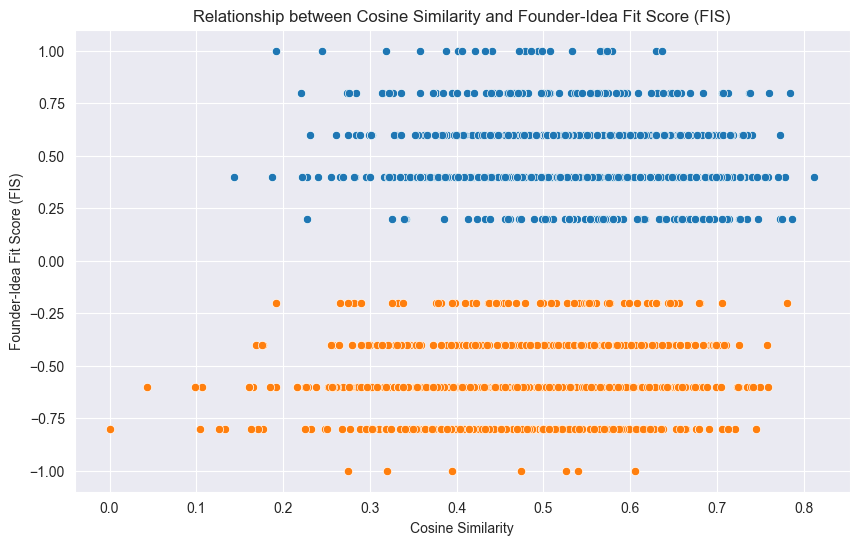

In [40]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'combined_data' contains both 'cosine_similarity' and 'FIS' columns
# Let's simulate a small portion of combined_data for demonstration purposes
combined_data = embeddings_successful[['FIS','cosine_similarity']]
combined_data_Un = embeddings_Unsuccessful[['FIS','cosine_similarity']]

# Plotting the relationship between cosine similarity and FIS
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cosine_similarity', y='FIS', data=combined_data)
sns.scatterplot(x='cosine_similarity', y='FIS', data=combined_data_Un)
plt.title('Relationship between Cosine Similarity and Founder-Idea Fit Score (FIS)')
plt.xlabel('Cosine Similarity')
plt.ylabel('Founder-Idea Fit Score (FIS)')
plt.savefig('plots/Relationship between Cosine Similarity and Founder-Idea Fit Score (FIS)')
plt.show()

### It's not really linear. Let's investigate it further



In [39]:
import statsmodels.api as sm
from scipy.stats import pearsonr

# Combine the datasets and create a binary 'success' column, 1 for successful and 0 for unsuccessful
embeddings_Unsuccessful['success'] = 0
embeddings_successful['success'] = 1
combined_data_all = pd.concat([embeddings_Unsuccessful, embeddings_successful])

combined_data_all.to_csv(os.path.join(DATA_DIRPATH, 'final_combined_data.csv'))

# Assume X is the cosine similarity array and Y is the FIS array, already loaded and preprocessed
X = combined_data_all['cosine_similarity']
Y = combined_data_all['FIS']

# Calculate Pearson correlation coefficient
correlation_coef, p_value = pearsonr(X, Y)
print(f'Pearson correlation coefficient: {correlation_coef}, p-value: {p_value}')

# Fit a simple linear regression model
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(Y, X)
results = model.fit()

print(results.summary())

# Check for non-linearity (optional)
# Apply a non-linear transformation or fit a non-linear model as necessary

Pearson correlation coefficient: 0.17341844059350578, p-value: 1.497518616022364e-14
                            OLS Regression Results                            
Dep. Variable:                    FIS   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     60.03
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           1.50e-14
Time:                        15:46:09   Log-Likelihood:                -1601.4
No. Observations:                1938   AIC:                             3207.
Df Residuals:                    1936   BIC:                             3218.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

## Finally let's build the model!

### Structure: CNN-LSTM

In [41]:
embeddings_successful.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0.1                 994 non-null    int64  
 1   founder_linkedin_url         994 non-null    object 
 2   json_string_x                994 non-null    object 
 3   structured_info_x            994 non-null    object 
 4   paragraph_x                  994 non-null    object 
 5   segment                      994 non-null    object 
 6   level                        994 non-null    float64
 7   PFS                          994 non-null    float64
 8   FIS                          994 non-null    float64
 9   Unnamed: 0                   994 non-null    int64  
 10  org_name                     994 non-null    object 
 11  org_uuid                     994 non-null    object 
 12  json_string_y                994 non-null    object 
 13  structured_info_y   

In [78]:
import pandas as pd
import numpy as np
from ast import literal_eval
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models, optimizers, regularizers

# Convert embeddings to numerical format
embeddings_successful['embedding_founder_info'] = embeddings_successful['embedding_founder_info']
embeddings_successful['embedding_startup_info_long'] = embeddings_successful['embedding_startup_info_long']

# Prepare the input features and labels
X_embeddings = np.array(embeddings_successful['embedding_founder_info'].tolist())
X_embeddings_2 = np.array(embeddings_successful['embedding_startup_info_long'].tolist())
X_cosine = embeddings_successful['cosine_similarity'].values.reshape(-1, 1)
X = np.concatenate([X_embeddings, X_embeddings_2, X_cosine], axis=1)

print(X)

y = embeddings_successful['FIS'].values  # Labels

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape input features for CNN-LSTM model
# (samples, time steps, features per step)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define a simple fully connected neural network architecture
model = models.Sequential()

# Input Dense Layer
model.add(layers.Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(layers.Dropout(0.2))

# Additional Dense Layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))

# Output Layer - predicts the continuous FIS
model.add(layers.Dense(1, activation=None))  # For regression, no activation function is used in the output layer.

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Print the model summary to verify the architecture
model.summary()

# Train the model with the training data
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Evaluate the model with the test data
performance = model.evaluate(X_test, y_test)
print(f'Test Loss: {performance[0]}, Test Mean Squared Error: {performance[1]}')
# Evaluate the model with the test data
performance = model.evaluate(X_test, y_test)
print(f'Test Loss: {performance[0]}, Test Mean Squared Error: {performance[1]}')

/Users/wangxiang/Desktop/VelaInternship/venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 128)            │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,177 (133.50 KB)

 Trainable params: 34,177 (133.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7687 - mean_squared_error: 0.7688 - val_loss: 0.1600 - val_mean_squared_error: 0.1694
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3594 - mean_squared_error: 0.3595 - val_loss: 0.1171 - val_mean_squared_error: 0.1220
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2095 - mean_squared_error: 0.2095 - val_loss: 0.0953 - val_mean_squared_error: 0.0985
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1525 - mean_squared_error: 0.1526 - val_loss: 0.0674 - val_mean_squared_error: 0.0689
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1092 - mean_squared_error: 0.1092 - val_loss: 0.0637 - val_mean_squared_error: 0.0637
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0929 - mean_squared_error: 0.0929 - val_loss: 0.0571 - val_mean_squared_error: 0.0565
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0815 - mean_squared_error: 0.0815 - val_loss: 0.0565 - val_mean_

In [53]:
type(embeddings_successful['embedding_startup_info_long'][1][1])

float

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models, optimizers

# Convert embeddings to numerical format
embeddings_successful['embedding_founder_info'] = embeddings_successful['embedding_founder_info']
embeddings_successful['embedding_startup_info_long'] = embeddings_successful['embedding_startup_info_long']

# Prepare the input features and labels
X_embeddings = np.array(embeddings_successful['embedding_founder_info'].tolist())
X_embeddings_2 = np.array(embeddings_successful['embedding_startup_info_long'].tolist())
X_cosine = embeddings_successful['cosine_similarity'].values.reshape(-1, 1)
X = np.concatenate([X_embeddings, X_embeddings_2, X_cosine], axis=1)

y = embeddings_successful['FIS'].values  # Labels

# Normalize features
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

print(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple fully connected neural network architecture
model = models.Sequential()

# Input layer specifying the shape of the input data
model.add(layers.Input(shape=(X_train.shape[1],)))

# Input Dense Layer without specifying input_dim or input_shape
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))

# Additional Dense Layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))

# Output Layer - predicts the continuous FIS
model.add(layers.Dense(1))  # For regression, no activation function is used in the output layer.

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Print the model summary to verify the architecture
model.summary()

# Train the model with the training data
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=32)

# Evaluate the model with the test data
performance = model.evaluate(X_test, y_test)
print(f'Test Loss: {performance[0]}, Test Mean Squared Error: {performance[1]}')

NameError: name 'embeddings_successful' is not defined

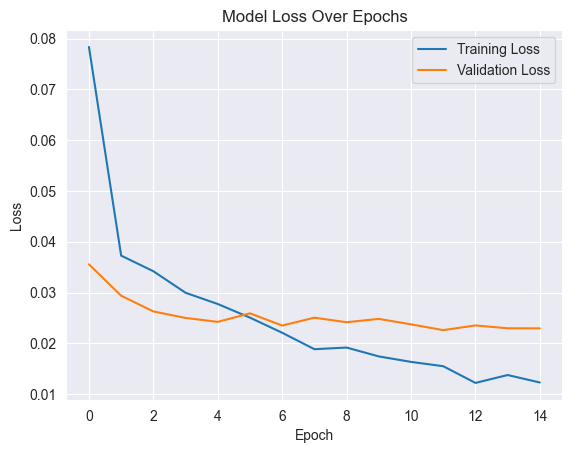

In [97]:
import matplotlib.pyplot as plt

# Plotting
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('plots/Model_Neural_network.png')
plt.show()

In [98]:
# Save the Keras model to HDF5 file
model.save('models/neural_network.keras')

KeyError: 'categories'

In [95]:
# Assuming 'embeddings_successful' is your original DataFrame

# Extract the first row for founder and startup embeddings and cosine similarity
first_founder_embedding = np.array(literal_eval(embeddings_successful.iloc[0]['embedding_founder_info']))
first_startup_embedding = np.array(literal_eval(embeddings_successful.iloc[0]['embedding_startup_info_long']))
first_cosine_similarity = np.array([embeddings_successful.iloc[0]['cosine_similarity']]).reshape(-1, 1)

# Combine into a single array
first_instance_features = np.concatenate([first_founder_embedding, first_startup_embedding, first_cosine_similarity], axis=1)

# Note: Ensure that 'literal_eval' is necessary and correct based on how your embeddings are stored in the DataFrame.
# If embeddings are already in an appropriate numerical format, you might not need 'literal_eval'.


ValueError: malformed node or string: [-0.05366436392068863, 0.017745016142725945, -0.08322985470294952, -0.23583699762821198, -0.16623073816299438, -0.057098884135484695, 0.06119168549776077, 0.004736774601042271, -0.09971554577350616, 0.14665398001670837, -0.06004684790968895, -0.08695058524608612, 0.05575369670987129, 0.0861491933465004, 0.057270608842372894, -0.012206854298710823, -0.10933219641447067, 0.08666437119245529, -0.14985953271389008, -0.05191848427057266, 0.1677190214395523, -0.005284151062369347, 0.03211275488138199, 0.03202689439058304, 0.05618301406502724, 0.005262685474008322, -0.0019927367102354765, -0.006221488583832979, -0.16749006509780884, -0.013423246331512928, 0.11849091947078705, 0.11236602813005447, -0.026817871257662773, 0.027662191540002823, 0.04659498110413551, -0.03165481984615326, 0.09490721672773361, -0.024685608223080635, -0.023383352905511856, -0.04401908814907074, 0.07716219872236252, -0.024413708597421646, -0.021766265854239464, 0.016285346820950508, 0.1172315925359726, -0.0004152280162088573, -0.05360712110996246, -0.02680356055498123, -0.09502170234918594, -0.0653703510761261, 0.016829144209623337, 0.061306171119213104, 0.0022664249408990145, 0.04496358335018158, 0.1278786063194275, -0.07040764391422272, 0.14825674891471863, 0.14436429738998413, 0.0011439453810453415, -0.007298353593796492, -0.023826977238059044, 0.019519519060850143, 0.0031161108054220676, -0.12742066383361816, 0.26812148094177246, -0.010010193102061749, 0.2678925096988678, 0.3205551505088806, -0.10853081196546555, 0.11585778743028641, -0.07172421365976334, 0.021694714203476906, 0.1442498117685318, 0.14596706628799438, 0.049514319747686386, -0.08271467685699463, -0.0027869693003594875, 0.041443198919296265, 0.08964095264673233, 0.07721944153308868, 0.11894885450601578, 0.01704380288720131, -0.05478058382868767, -0.09622378647327423, -0.12982483208179474, -0.004815482534468174, 0.005480920430272818, -0.27705124020576477, 0.1538664698600769, 0.037836953997612, 0.08861059695482254, 0.15375198423862457, -0.05452299490571022, -0.051775380969047546, 0.16852042078971863, 0.05432264879345894, 0.09004165232181549, -0.03322897478938103, -0.0021590963006019592, -0.016986560076475143]